In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.special import erf
from scipy import optimize, stats


In [297]:
def power_fit(I, Ith, eta, C):
    #eta = 2.08366e10*293/lambd/7.5e9
    zeta = I/Ith
    return np.sqrt(2*eta/np.pi/zeta)*np.exp(-(zeta-1)**2/2/zeta/eta)/(1 + erf((zeta-1)/np.sqrt(2*zeta*eta))) + (zeta-1)/zeta + C

In [298]:
def errorf(z, points=1e6):
    time = np.linspace(0, z, 1000000)
    integral = 0
    for t in time:
        integral =+ np.exp(-t**2)*(time[1]-time[0])
    return 2*integral/np.sqrt(np.pi)

In [299]:
def errorf(I, Ith, eta):
    #eta = 2.08366e10*293/lambd/7.5e9
    zeta = I/Ith
    return 1.0 + erf((zeta-1)/np.sqrt(2*zeta*eta))

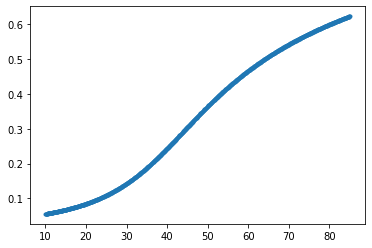

In [345]:
plt.plot(np.linspace(10, 85, 1000), power_fit(I=np.linspace(10, 85, 1000), Ith=32, eta=0.04, C=0), '.-')
#plt.ylim(0, 1)

In [406]:
bls = np.loadtxt(fname='freq vs I_BLS.csv', delimiter=';')
eletrical = np.loadtxt(fname='freq vs I_electrical.csv', delimiter=';')
currents = np.linspace(10, 85, np.shape(bls)[1]-9)

In [407]:
currents

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61.,
       62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 74.,
       75., 76., 77., 78., 79., 80., 81., 82., 83., 84., 85.])

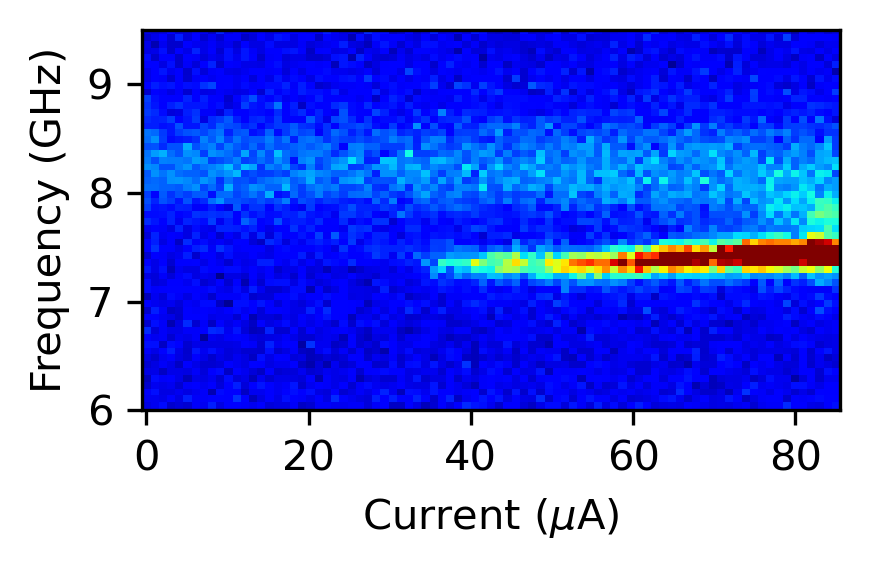

In [44]:
plt.figure(figsize=(3,2), dpi=300)
plt.pcolormesh(np.linspace(0, 85, np.shape(bls)[1]), np.linspace(-2.937, 10.06, np.shape(bls)[0]), bls,
           vmin=0, vmax=150,
               cmap='jet')
plt.ylim(6, 9.5)
plt.xlabel(r'Current ($\mu$A)')
plt.ylabel('Frequency (GHz)')
plt.tight_layout()
plt.savefig('L23C08-bls.png', dpi=300, facecolor='white')

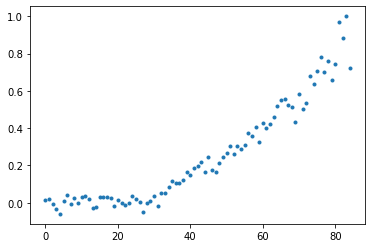

In [416]:
p = np.sum(bls[140:,:], axis=0)-np.mean(np.sum(bls[140:,:10],  axis=0))
p = p/max(p)
plt.plot(p, '.')
#plt.yscale('log')

In [417]:
popt1, pcov1 = optimize.curve_fit(f = power_fit, xdata = currents, ydata = p[9:], p0=(20, 0.03, 0), maxfev=240000)

C:\Users\vhgon\AppData\Local\Temp\ipykernel_20972\3806431839.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(2*eta/np.pi/zeta)*np.exp(-(zeta-1)**2/2/zeta/eta)/(1 + erf((zeta-1)/np.sqrt(2*zeta*eta))) + (zeta-1)/zeta + C


Text(0.5, 1.0, 'Ith=30.48$\\mu$A; $\\eta$=0.03')

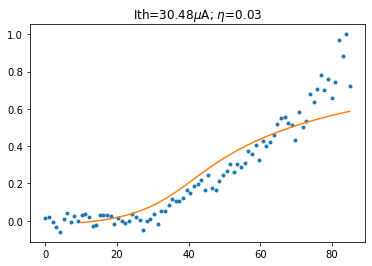

In [418]:
plt.plot(np.linspace(0, 85, len(p)), p, '.')
plt.plot(currents, power_fit(currents, *popt1))
plt.title(r'Ith={:.2f}$\mu$A; $\eta$={:.2f}'.format(popt1[0], popt1[1]))

Text(0.5, 1.0, 'Ith=34.05$\\mu$A; $\\eta$=0.04')

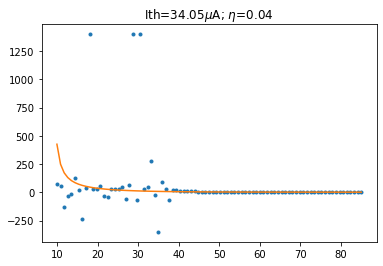

In [383]:
plt.plot(np.linspace(10, 85, len(p)), 1/p, '.')
plt.plot(currents, 1/power_fit(currents, *popt1))
plt.title(r'Ith={:.2f}$\mu$A; $\eta$={:.2f}'.format(popt1[0], popt1[1]))

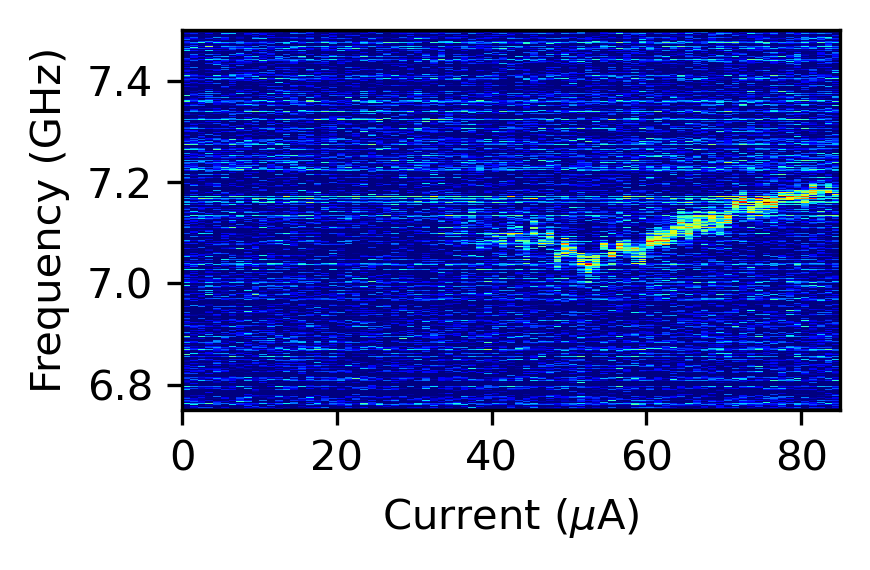

In [126]:
plt.figure(figsize=(3,2), dpi=300)
plt.pcolormesh(np.linspace(0, 85, np.shape(electrical)[1]+1), np.linspace(6.75, 7.5, np.shape(electrical)[0]+1), electrical,
           vmin=0, vmax=0.35,
               cmap='jet')
plt.xlabel(r'Current ($\mu$A)')
plt.ylabel('Frequency (GHz)')
plt.tight_layout()
plt.savefig('L23C08-electrical.png', dpi=300)

In [384]:
bls_auto = np.loadtxt('BLS_counts_vs_current_10nm.dat')

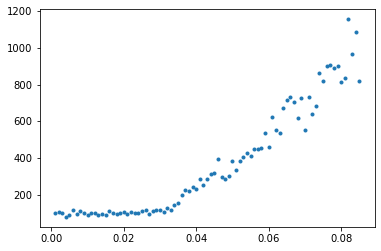

In [387]:
plt.plot(bls_auto[:,0], bls_auto[:,1], '.')

In [423]:
popt1, pcov1 = optimize.curve_fit(f = power_fit, xdata = currents, ydata = bls_auto[9:, 1], p0=(20, 0.03, 0), maxfev=240000)

C:\Users\vhgon\AppData\Local\Temp\ipykernel_20972\3806431839.py:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*eta/np.pi/zeta)*np.exp(-(zeta-1)**2/2/zeta/eta)/(1 + erf((zeta-1)/np.sqrt(2*zeta*eta))) + (zeta-1)/zeta + C
C:\Users\vhgon\AppData\Local\Temp\ipykernel_20972\3806431839.py:4: RuntimeWarning: overflow encountered in exp
  return np.sqrt(2*eta/np.pi/zeta)*np.exp(-(zeta-1)**2/2/zeta/eta)/(1 + erf((zeta-1)/np.sqrt(2*zeta*eta))) + (zeta-1)/zeta + C
C:\Users\vhgon\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 1.0, 'Ith=0.00$\\mu$A; $\\eta$=0.07')

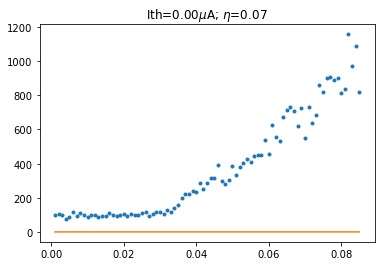

In [424]:
plt.plot(bls_auto[:,0], bls_auto[:,1], '.')
plt.plot(bls_auto[:,0], power_fit(bls_auto[:,0], *popt1))
plt.title(r'Ith={:.2f}$\mu$A; $\eta$={:.2f}'.format(popt1[0], popt1[1]))